In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
df = pd.read_csv('winequality.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
X=df.iloc[:,[8,9,11,12]]  #density,ph,alcohol,quality
#print(X[0:5])

print(np.isnan(X).sum())  # will give you true if you have missing values.


Y=df.iloc[:,0].values
#print(Y.head())

Y


density    0
pH         9
alcohol    0
quality    0
dtype: int64


array(['white', 'white', 'white', ..., 'red', 'red', 'red'], dtype=object)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   density  6497 non-null   float64
 1   pH       6488 non-null   float64
 2   alcohol  6497 non-null   float64
 3   quality  6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 203.2 KB


In [15]:
from sklearn.preprocessing import LabelEncoder
# for y
y_labelencoder = LabelEncoder ()
Y = y_labelencoder.fit_transform (Y)
print (Y)



from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer (missing_values = np.nan, strategy = 'mean')  
missingValueImputer = missingValueImputer.fit (X)

X = missingValueImputer.transform(X)


[1 1 1 ... 0 0 0]


In [21]:

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size = .20, random_state = 0)
#print("splitting done")
print(X_train.shape)
#print(y_train)	
print(X_test.shape)	
print("Training dataset")
print(X_train)




(5197, 4)
(1300, 4)
Training dataset
[[ 0.9982   3.2      9.4      6.     ]
 [ 0.9954   3.15     9.1      5.     ]
 [ 0.99712  3.25    10.       5.     ]
 ...
 [ 1.0103   3.15     8.8      6.     ]
 [ 0.99558  3.13    10.8      6.     ]
 [ 0.99335  3.09    10.       5.     ]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=10, random_state=42, criterion = 'entropy',max_depth=2)


RFclassifier.fit(X_train,y_train) # training



prediction = RFclassifier.predict(X_test)# testing 


print(prediction)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, prediction))



X_test.shape

[1 0 1 ... 1 1 1]
0.8292307692307692


(1300, 4)

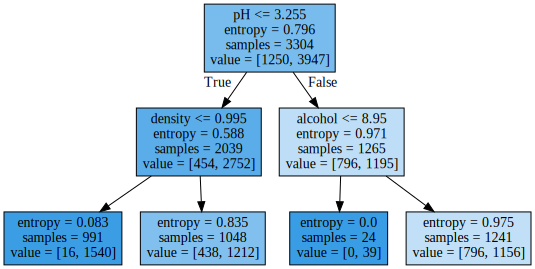

In [22]:
estimators=RFclassifier.estimators_[3] # 5 desicion tree in random forest
labels=['density', 'pH', 'alcohol', 'quality']
!pip install graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(estimators, out_file=None
   , feature_names=labels
   , filled = True))
display(SVG(graph.pipe(format='svg')))





In [29]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = "entropy")
decision_tree.fit(X_train, y_train) # training to machine
predictValues =decision_tree.predict(X_test) # test the machine 

predictValues




array([0, 1, 1, ..., 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score
import numpy as np

print(accuracy_score(y_test, predictValues))


0.8946153846153846


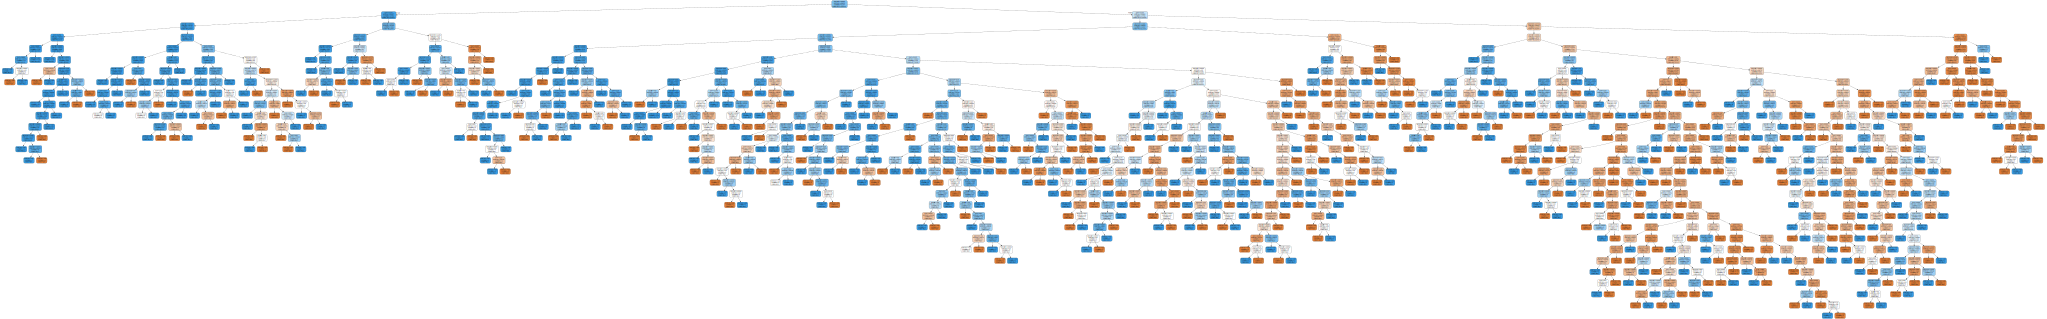

In [26]:
labels=['density', 'pH', 'alcohol', 'quality']
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(decision_tree, feature_names=labels, filled = True,rounded=True))
display(SVG(graph.pipe(format='svg')))